In [1]:
import numpy as np  
import pylab as pl  
import scipy.spatial.distance as dist  

In [2]:
def plotSamples(x, y, z=None):  
    stars = np.matrix([[3., -2., 0.], [3., 2., 0.]])  
    if z is not None:  
        x, y = z * np.matrix([x, y])  
        stars = z * stars  
    pl.scatter(np.array(x), np.array(y), s=10)    # 畫gaussian隨機點  
    pl.scatter(np.array(stars[0]), np.array(stars[1]), s=200, marker='*', color='r')  # 畫3個指定點 
    pl.axhline(linewidth=2, color='g') # 畫X軸  
    pl.axvline(linewidth=2, color='g')  # 畫Y軸  
    pl.axis('equal')  
    pl.axis([-5, 5, -5, 5])  
    pl.show()  


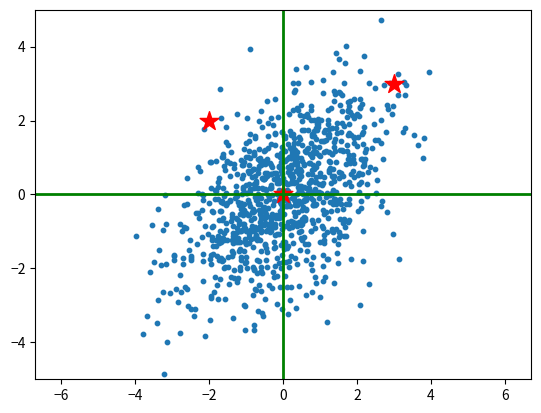

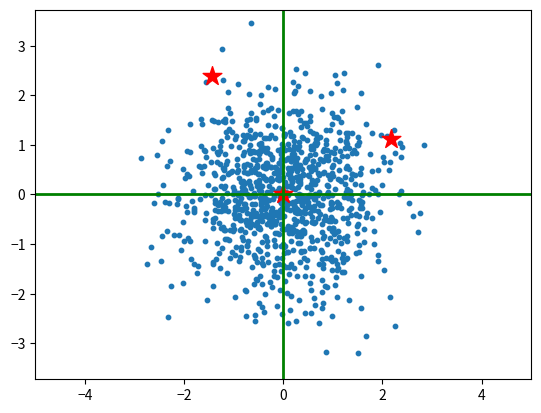

In [3]:
mean = [0, 0]      # 平均值  
cov = [[2, 1], [1, 2]]   # Covariance(共異變數)  
x, y = np.random.multivariate_normal(mean, cov, 1000).T  
plotSamples(x,y)  
covMat = np.matrix(np.cov(x, y))    # x與y的共異變數矩陣  
Z = np.linalg.cholesky(covMat).I    # 邱列斯基矩陣  
plotSamples(x, y, Z)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [5]:
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

In [6]:
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

In [7]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [8]:
X_outliers

array([[ 1.43449626,  0.88241945],
       [-0.04280034, -3.84157175],
       [ 0.11367557, -1.24925132],
       [ 1.4147694 ,  2.397201  ],
       [ 2.17339596,  0.85566945],
       [ 1.09712873, -0.35935333],
       [-3.09882751, -1.97505881],
       [ 3.42690551, -1.76260758],
       [ 1.18141391, -2.37618782],
       [ 2.77642077, -0.41248286],
       [ 0.98836726, -0.57404618],
       [-2.32868113,  3.30082721],
       [-3.99159345, -0.12766232],
       [-2.87966067,  1.82143565],
       [ 0.83254571,  1.69497633],
       [-2.3612011 ,  3.53820012],
       [-3.12535879,  3.66612301],
       [ 3.52332304, -0.81828543],
       [ 0.3338692 , -1.21573839],
       [ 2.64404331,  0.40985941]])

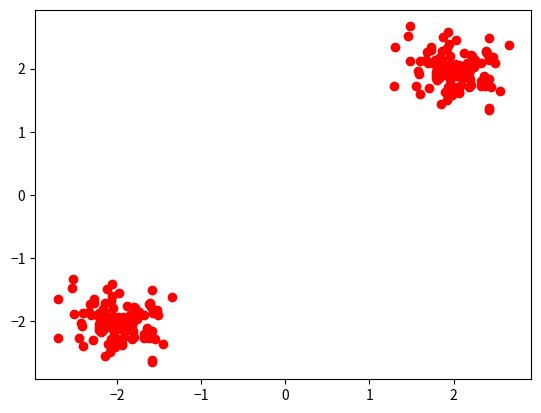

In [9]:
plt.scatter(X_train[:,0],X_train[:,1],c='r') #正常資料
plt.show()

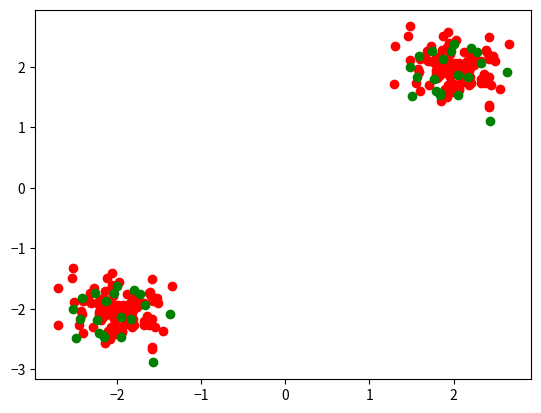

In [10]:
plt.scatter(X_train[:,0],X_train[:,1],c='r')  #正常資料用於訓練
plt.scatter(X_test[:,0],X_test[:,1],c='g')    #正常資料用於測試
plt.show()

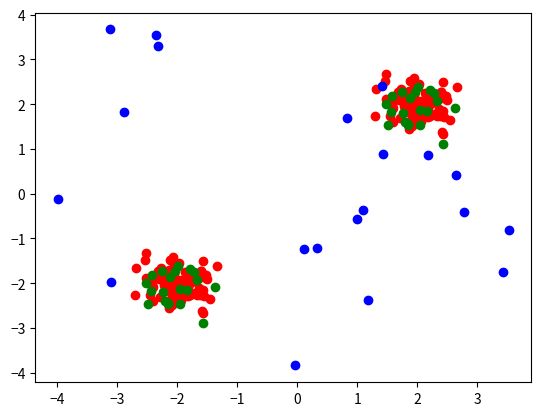

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c='r')       #正常資料用於訓練(Novelty Dection)
plt.scatter(X_test[:,0],X_test[:,1],c='g')         #正常資料用於測試
plt.scatter(X_outliers[:,0],X_outliers[:,1],c='b') #異常資料用於測試
plt.show()

In [12]:
#半監督式學習,X_train是紅色部分,全都是正常資料
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)   #nu是訓練誤差的上限,也用作support vector的下限
clf.fit(X_train) #fit後,clf學習到正常資料的邊界

OneClassSVM(gamma=0.1, nu=0.1)

In [13]:
y_pred_train = clf.predict(X_train)      #因為X_train都是正常資料,理論上y_pred_train的預測值,應該大多數的是正常(訓練誤差)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size                      #請注意-1為異常值
n_error_test = y_pred_test[y_pred_test == -1].size                 
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size              #請注意1為正常值

In [14]:
print(n_error_train,n_error_test,n_error_outliers)

20 5 0


#### 訓練資料全都是正常資料,但訓練後所得模型,將部份訓練資料判斷為異常資料(20筆)
#### 想要降低訓練誤差,可以將nu調小(0,1]

In [15]:
#顯示訓練集的異常值
X_train[y_pred_train==-1]

array([[ 1.30429553,  2.34401783],
       [ 2.54947307,  1.6400073 ],
       [ 1.9372155 ,  2.58483185],
       [ 1.46313241,  2.51461117],
       [ 2.41828968,  1.37253432],
       [ 2.65526912,  2.37813074],
       [ 1.48226514,  2.66852063],
       [ 1.29862481,  1.72537758],
       [ 2.42377649,  2.48701781],
       [ 2.42065726,  1.3406623 ],
       [-2.69570447, -1.65598217],
       [-1.45052693, -2.3599927 ],
       [-2.53686759, -1.48538883],
       [-1.58171032, -2.62746568],
       [-2.51773486, -1.33147937],
       [-2.70137519, -2.27462242],
       [-2.51307263, -1.88463431],
       [-2.39936848, -2.39786029],
       [-1.57934274, -2.6593377 ],
       [-2.1442549 , -2.56031312]])

In [16]:
#顯示訓練集的正常值
X_train[y_pred_train==1]

array([[ 2.15133704,  1.99667531],
       [ 2.19112948,  1.97510484],
       [ 1.95292161,  2.20830585],
       [ 2.36235994,  1.88045083],
       [ 2.03187596,  1.8760232 ],
       [ 1.86022204,  2.28709067],
       [ 1.80652754,  1.81606184],
       [ 2.3883162 ,  2.2628632 ],
       [ 1.92683916,  1.9027597 ],
       [ 2.39085752,  2.27977719],
       [ 2.48984031,  2.0962636 ],
       [ 2.04018584,  1.94019397],
       [ 1.89239117,  1.93277762],
       [ 1.69259155,  2.09538477],
       [ 1.58041579,  1.96780886],
       [ 1.97223756,  2.06392058],
       [ 2.25838977,  2.13566589],
       [ 1.93121365,  1.57942408],
       [ 1.71221808,  1.69575246],
       [ 1.76035132,  2.08865216],
       [ 2.20327857,  2.21804553],
       [ 2.24257919,  2.03185436],
       [ 2.05535287,  1.96051856],
       [ 1.58919154,  1.92003624],
       [ 2.37693971,  1.72943478],
       [ 1.94180047,  2.39430283],
       [ 1.73061529,  2.28982785],
       [ 2.32324065,  1.79677593],
       [ 1.68468347,

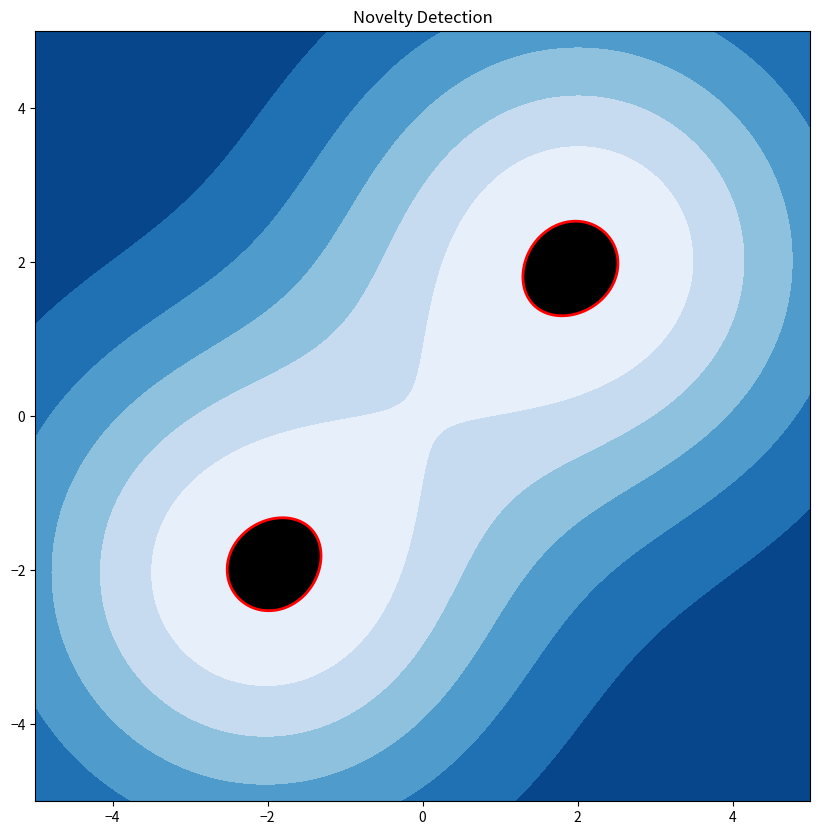

In [17]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red') #紅色邊框之內為正常值,之外為異常值.將nu降低,可以擴張紅色邊框
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')
plt.show() 

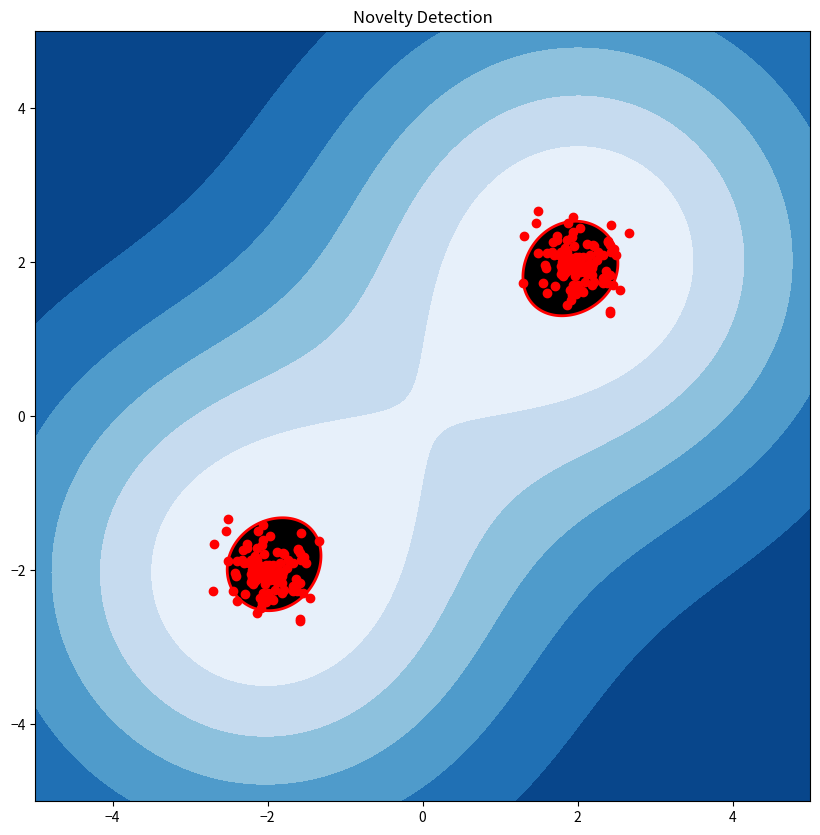

In [18]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')
a1 = plt.scatter(X_train[:,0],X_train[:,1],c='r')
plt.show()

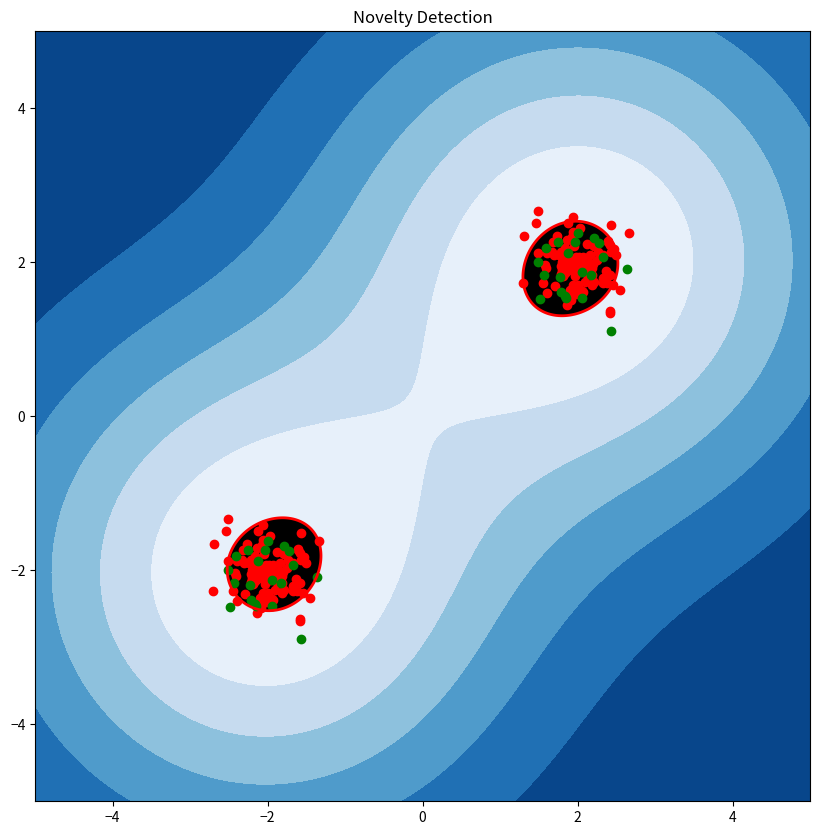

In [19]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')
 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='red')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
plt.show()

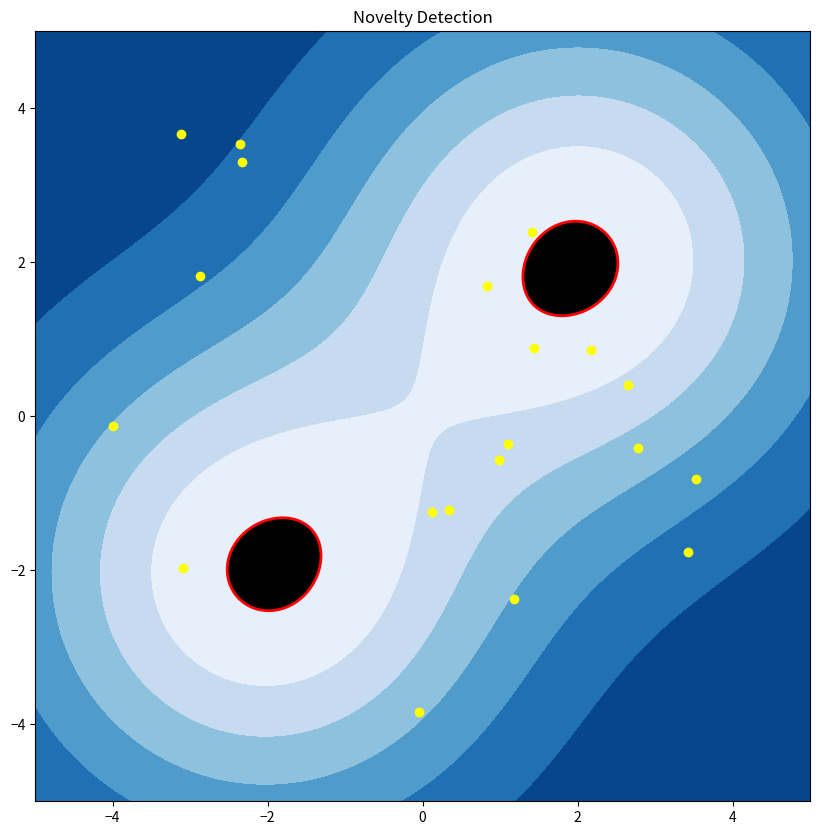

In [20]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='yellow')
plt.show()


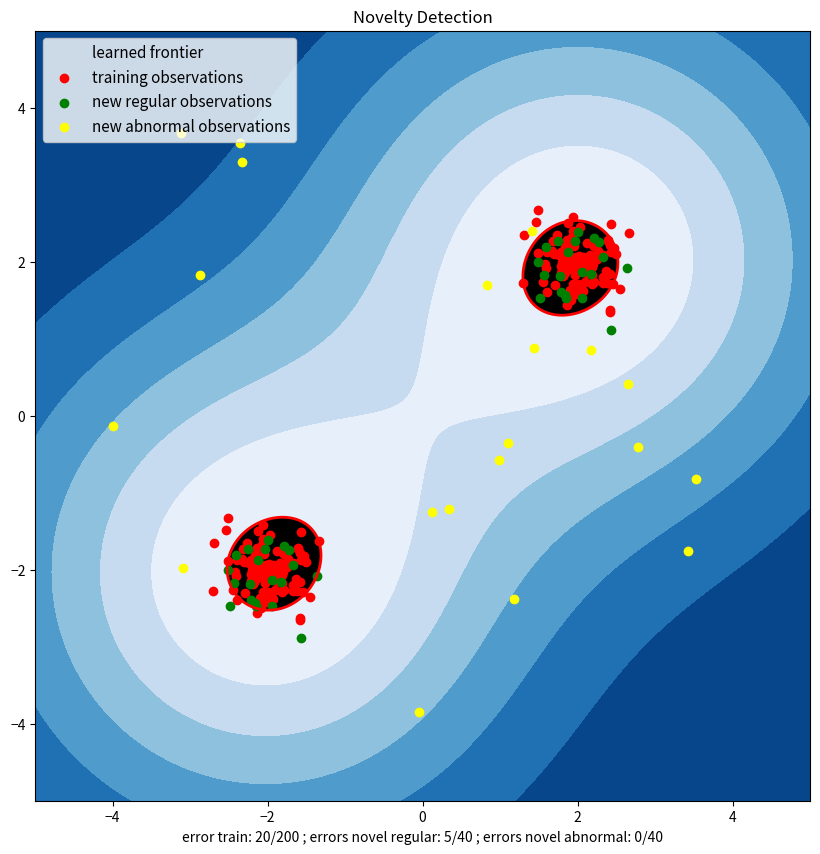

In [21]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='red')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='yellow')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

nu=0.01,gamma=0.1 3 2 1


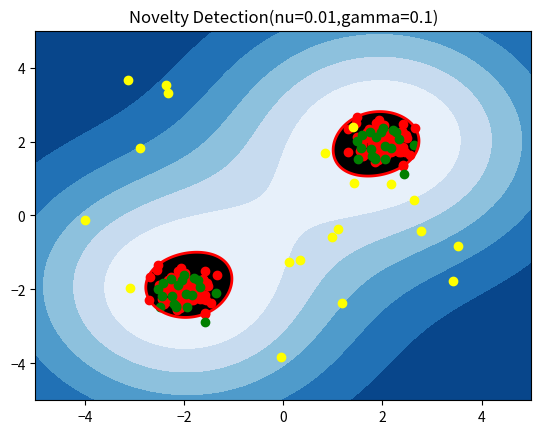

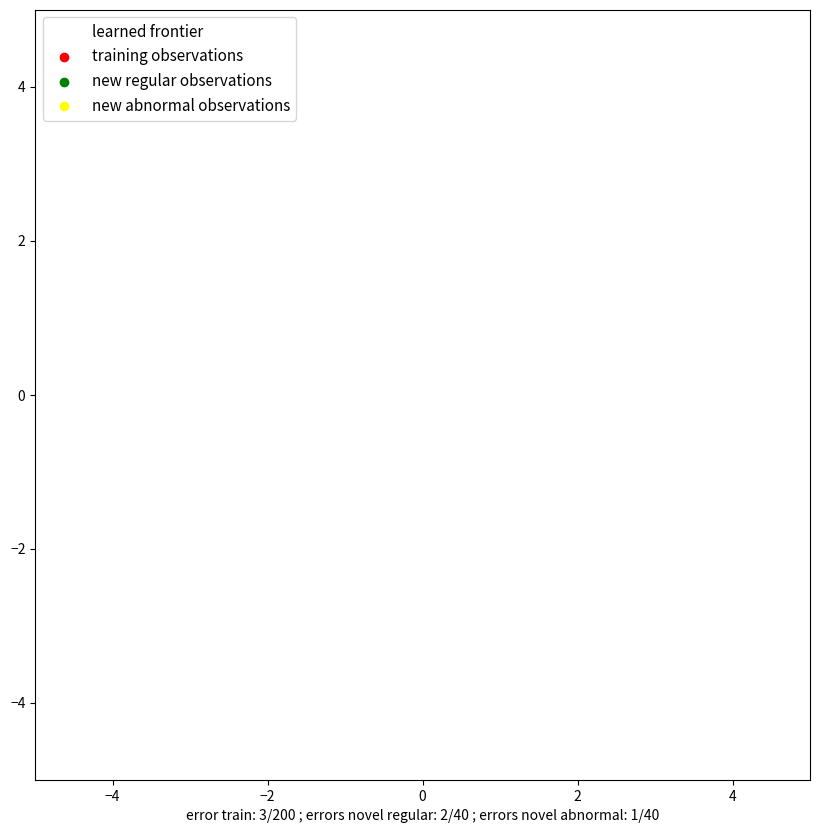

In [22]:
#半監督式學習,nu=0.01,gamma=0.1
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print('nu=0.01,gamma=0.1',n_error_train,n_error_test,n_error_outliers)
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.title("Novelty Detection(nu=0.01,gamma=0.1)")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='red')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='yellow')

plt.figure(figsize=(10,10))
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

nu=0.1,gamma=0.01 19 10 11


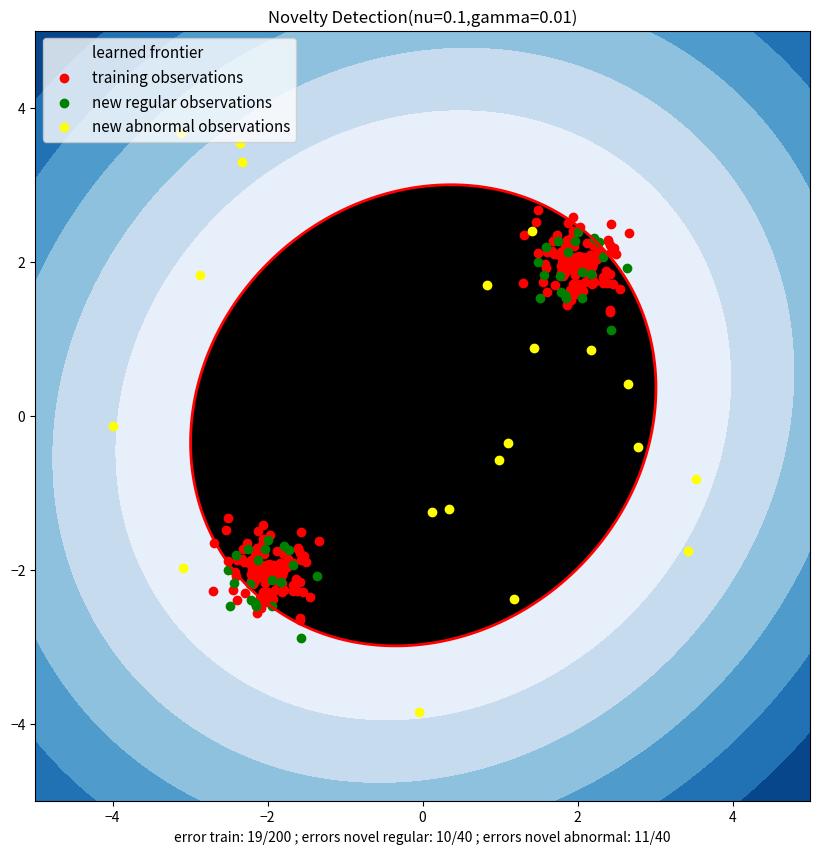

In [23]:
#半監督式學習,gamma=0.01
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.01)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print('nu=0.1,gamma=0.01',n_error_train,n_error_test,n_error_outliers)
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection(nu=0.1,gamma=0.01)")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='red')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='yellow')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

nu=0.01,gamma=0.01 3 1 11


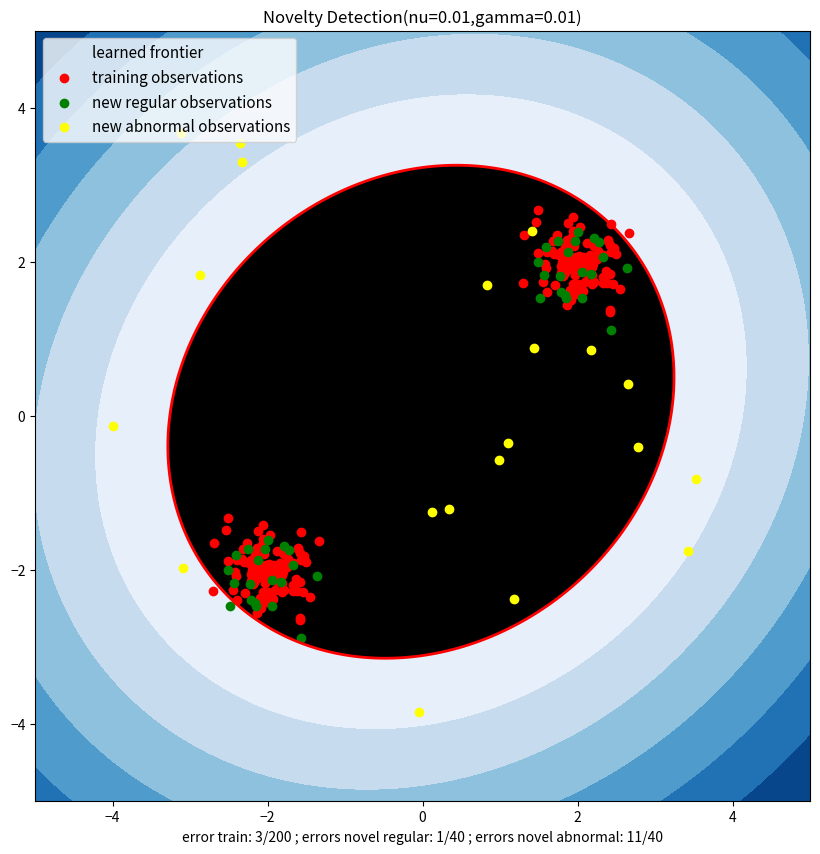

In [24]:
#半監督式學習,nu=0.01,gamma=0.01
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print('nu=0.01,gamma=0.01',n_error_train,n_error_test,n_error_outliers)
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection(nu=0.01,gamma=0.01)")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='red')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='yellow')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [25]:
import numpy as np
from sklearn.covariance import EllipticEnvelope   #橢圓限界,如果資料集接近常態分佈
import matplotlib.pyplot as plt
import matplotlib.font_manager

X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

X_outliers_train = np.random.uniform(low=-3, high=3, size=(10, 2))
X_outliers_test = np.random.uniform(low=-3, high=3, size=(10, 2))

X_train = np.concatenate((X_train,X_outliers_train),axis=0) 
X_test = np.concatenate((X_test,X_outliers_test),axis=0) 

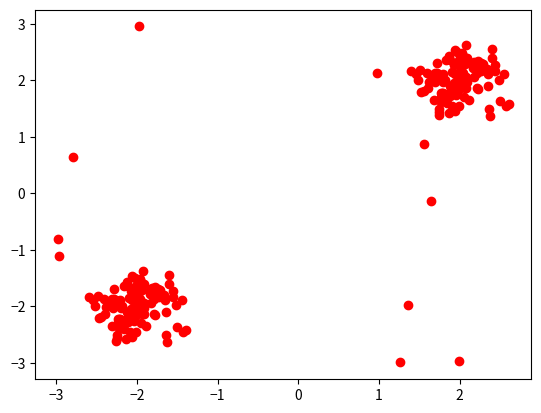

In [26]:
plt.scatter(X_train[:,0],X_train[:,1],c='r')  #訓練資料包含可能異常的資料,但沒有明確標籤描述正常或異常.所以是無監督式學習
plt.show()

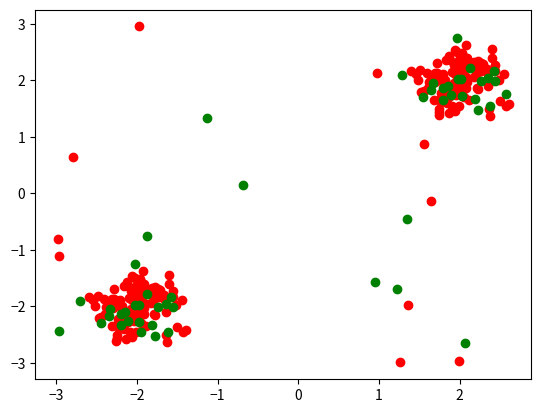

In [27]:
plt.scatter(X_train[:,0],X_train[:,1],c='r')
plt.scatter(X_test[:,0],X_test[:,1],c='g')
plt.show()

Outlier detection result: [ 1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1]


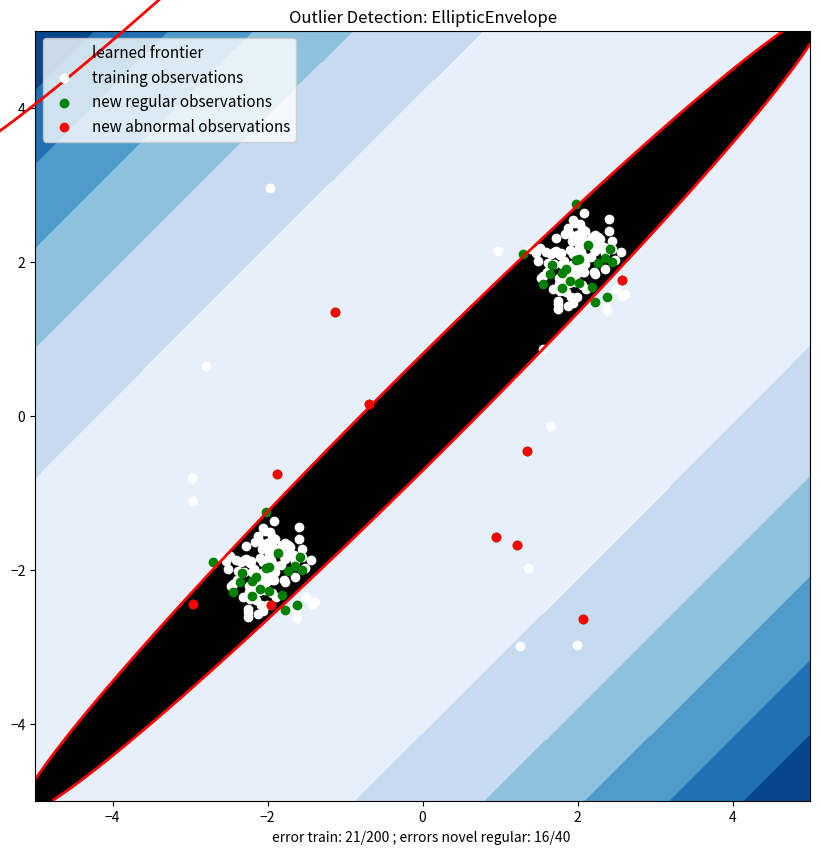

In [28]:
clf = EllipticEnvelope()                
clf.fit(X_train)                        #訓練資料裡有異常資料
y_pred_train = clf.predict(X_train)     #使用學習後的模型預測訓練資料,那些是正常,那些是異常
y_pred_test = clf.predict(X_test)

print ("Outlier detection result:",y_pred_test)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.title("Outlier Detection: EllipticEnvelope")

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')
 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers_test[:, 0], X_outliers_test[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 "
    % (n_error_train, n_error_test))
plt.show()

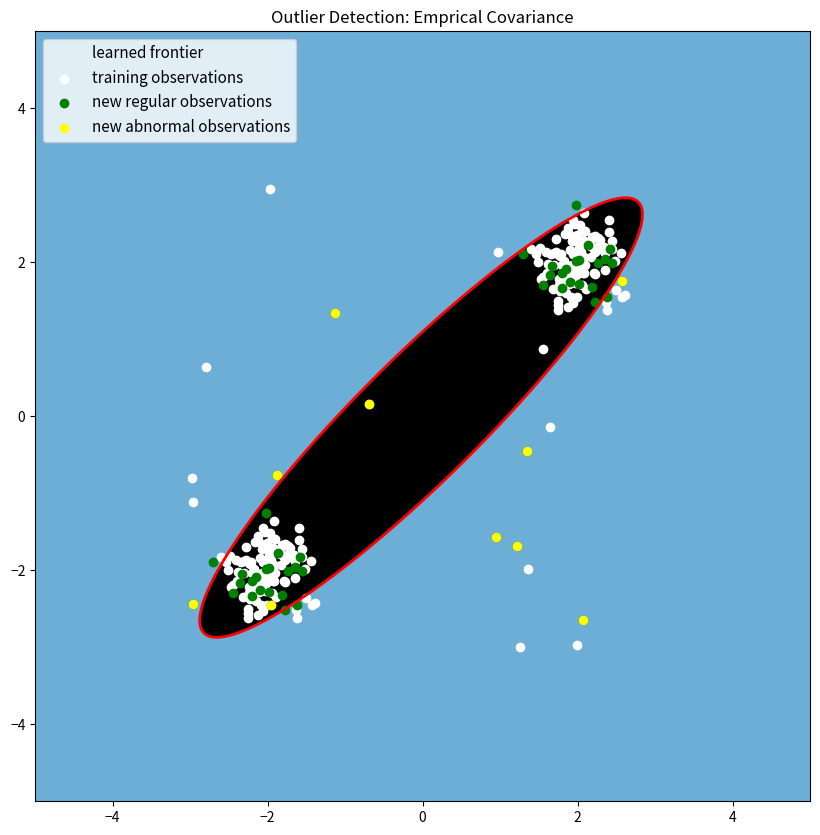

In [29]:
from sklearn.covariance import EmpiricalCovariance  #經驗共變異數
clf = EmpiricalCovariance()                         #contamination=0.1,訓練資料中異常資料的比率(0~0.5)
clf.fit(X_train)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = clf.mahalanobis(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.title("Outlier Detection: Emprical Covariance")

plt.contourf(xx, yy, Z,levels=np.linspace(Z.min(), Z.max(), 7),colors='black')
a = plt.contour(xx, yy, Z, levels=[2], linewidths=2,colors='red')
plt.contourf(xx, yy, Z, levels=[2,Z.max()], cmap=plt.cm.Blues_r)
 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers_test[:, 0], X_outliers_test[:, 1], c='yellow')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))

plt.show()

Outlier detection result: [ 1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1]


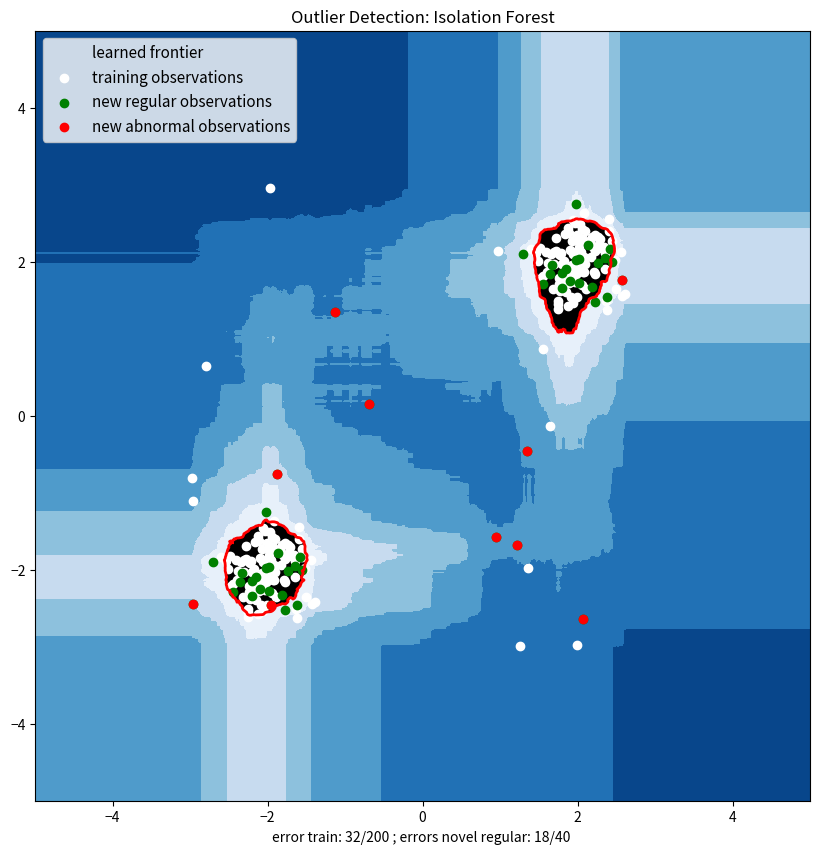

In [30]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()        #contamination=auto,訓練資料中異常資料的比率(0~0.5),n_estimators=100(預設)
clf.fit(X_train)

y_pred_train = clf.predict(X_train)    
y_pred_test = clf.predict(X_test)

print ("Outlier detection result:",y_pred_test)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.title("Outlier Detection: Isolation Forest")

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='black')
 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers_test[:, 0], X_outliers_test[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 "
    % (n_error_train, n_error_test))
plt.show()